In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Data Load

In [2]:
input_file_0='595.Isis.WHT.Red.txt'#astronomicalobsevations 
input_file_1='595.Isis.WHT.Blue.txt'#astronomicalobsevations 

In [3]:
data_0R=pd.read_table(input_file_0)#PandasDataFrameOriginalData
data_1R=data_0R.copy()#DataFrameForCalculations
data_1R.head()
#data_1.describe()

,Pos,X,Y,Slit,Archivo,Center,ErrC,Width,ErrW,Peak,...,Line.3,ErrL.3,Center.4,ErrC.4,Width.4,ErrW.4,Peak.4,ErrP.4,Line.4,ErrL.4
0,1.0,199.809,22.0,1.0,595r1_878-001004.xlsx,6562.267,0.211,-4.288,0.464,-31.70,...,8.525,7.594,6726.756,0.296,1.419,0.544,13.700,5.127,20.690,7.479
1,2.0,198.468,22.0,1.0,595r1_878-005008.xlsx,6557.690,0.228,0.882,0.404,16.36,...,18.900,6.029,6725.364,0.150,0.913,0.297,-1.937,4.781,-1.883,-4.577
2,3.0,197.127,22.0,1.0,595r1_878-009012.xlsx,6557.705,0.108,0.970,0.262,35.66,...,7.970,9.081,6724.843,0.551,2.664,1.016,8.852,3.333,25.110,9.367
3,4.0,195.786,22.0,1.0,595r1_878-013016.xlsx,6557.593,0.083,0.916,0.202,41.62,...,17.990,8.705,6725.727,0.605,2.698,1.057,3.842,2.687,11.030,8.172
4,5.0,194.445,22.0,1.0,595r1_878-017020.xlsx,6557.546,0.082,0.813,0.195,40.74,...,-14.250,-5.156,6724.045,0.154,0.948,0.355,-8.792,4.558,-8.870,-5.081


In [4]:
data_0B=pd.read_table(input_file_1)#PandasDataFrameOriginalData
data_1B=data_0B.copy()#DataFrameForCalculations
data_1B.head()

,Pos,X,Y,Slit,Archivo,Center,ErrC,Width,ErrW,Peak,...,ErrC.2,Width.2,ErrW.2,Peak.2,ErrP.2,Line.2,ErrL.2,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,1.0,214.5600,22.0,1.0,595a1_880-001004.xlsx,4853.837,0.185,0.644,0.374,10.260,...,50.299,176.260,76.337,-2.921,0.7299,-548.000,-348.100,NaN,NaN,NaN
1,2.0,213.1296,22.0,1.0,595a1_880-005008.xlsx,4855.518,0.298,0.287,0.873,-9.238,...,4.219,34.160,8.581,-2.898,0.7155,-105.400,-28.260,NaN,NaN,NaN
2,3.0,211.6992,22.0,1.0,595a1_880-009012.xlsx,4850.115,0.978,-1.573,1.036,3.090,...,1.416,7.574,2.570,-4.309,1.5730,-34.740,-12.440,NaN,NaN,NaN
3,4.0,210.2688,22.0,1.0,595a1_880-013016.xlsx,4514.190,5.551,-282.157,23.988,75.120,...,0.423,1.494,0.762,-5.956,3.1770,-9.471,-5.178,NaN,NaN,NaN
4,5.0,208.8384,22.0,1.0,595a1_880-017020.xlsx,4855.943,0.000,-0.242,0.121,-53.670,...,0.000,0.103,0.000,46700.000,0.0000,5126.000,4659.000,NaN,NaN,NaN


In [5]:
#Input
#Constant
c=299792.459#km/s
Dist=847000#pc
#Iraf
corrhelio=25.68#km/s
#Literature
T=7670#K
#Theory Lambda
lha=6562.8#Angstroms
lhb=4861#Angstroms
loiii=5008#Angstroms
ls=6731#Angstroms
ln=6583#Angstroms
#Atomic Weights
Hw=1.00794#
Nw=14.0067#
Sw=32.065#
Ow=15.9994#
#Observations
SigmaInstH=18#km/s
SigmaInstN=12#km/s
SigmaInstS=15#km/s
SigmaInstO=19#km/s


asctopc=(2*np.pi*Dist)/(360*3600)
asctopc

4.10637187899777

Filter on Data

In [6]:
mr=(data_1R.X<125)&(data_1R.X>75)
dataR=data_1R[mr]
mb=(data_1B.X<115)&(data_1B.X>85)
dataB=data_1B[mb]

Emission Lines

In [7]:
dataHa=dataR[['X','Y','Center','Peak','Width']]
dataHa.describe()

,X,Y,Center,Peak,Width
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,99.904500,10.555556,6538.539301,1266.556696,0.975997
std,14.726759,7.004072,354.600673,1791.295646,0.561617
min,75.096000,0.000000,0.000000,0.000000,-0.948000
25%,87.165000,5.000000,6557.556250,306.225000,0.931000
50%,99.904500,11.000000,6557.730000,595.250000,1.023000
75%,112.644000,15.000000,6557.930000,1263.250000,1.182750
max,124.713000,22.000000,6558.262000,9957.000000,2.665000


In [8]:
dataHb=dataB[['X','Y','Center','Peak','Width']]
dataHb.head()

,X,Y,Center,Peak,Width
70,114.4320,22.0,4855.618,4.117,5.186
71,113.0016,22.0,4855.685,-3.415,1.875
72,111.5712,22.0,4857.594,8.551,1.327
73,110.1408,22.0,4857.176,18.660,1.582
74,108.7104,22.0,4857.595,24.460,1.217


In [9]:
dataN=dataR[['X','Y','Center.2','Peak.2','Width.2']]
dataN.describe()

,X,Y,Center.2,Peak.2,Width.2
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,99.904500,10.555556,6559.187532,242.345439,1.432635
std,14.726759,7.004072,355.720490,415.917431,1.635061
min,75.096000,0.000000,0.000000,0.000000,-0.907000
25%,87.165000,5.000000,6578.239500,46.080000,0.806500
50%,99.904500,11.000000,6578.429500,95.800000,0.969500
75%,112.644000,15.000000,6578.600000,244.450000,1.421000
max,124.713000,22.000000,6580.439000,4581.000000,15.248000


In [10]:
dataS=dataR[['X','Y','Center.4','Peak.4','Width.4']]
dataS.describe()

,X,Y,Center.4,Peak.4,Width.4
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,99.904500,10.555556,6706.641921,80.316478,1.025462
std,14.726759,7.004072,363.717454,145.405560,0.909419
min,75.096000,0.000000,0.000000,-8.589000,-1.090000
25%,87.165000,5.000000,6726.121500,19.355000,0.777250
50%,99.904500,11.000000,6726.280500,37.635000,0.885000
75%,112.644000,15.000000,6726.442000,90.387500,1.019750
max,124.713000,22.000000,6730.643000,1937.000000,9.216000


In [11]:
dataO=dataB[['X','Y','Center.2','Peak.2','Width.2']]
dataHb.head()

,X,Y,Center,Peak,Width
70,114.4320,22.0,4855.618,4.117,5.186
71,113.0016,22.0,4855.685,-3.415,1.875
72,111.5712,22.0,4857.594,8.551,1.327
73,110.1408,22.0,4857.176,18.660,1.582
74,108.7104,22.0,4857.595,24.460,1.217


Halpha Emission Line

/home/zalenovo/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(72.60295558187197,
 127.20604441812803,
 -1.1350488574011364,
 23.135048857401138)

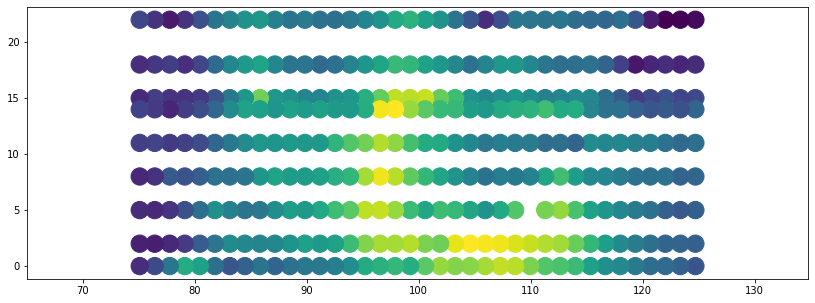

In [12]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataHa.X,dataHa.Y,c=np.log10(dataHa.Peak), s=300)
plt.axis('equal')

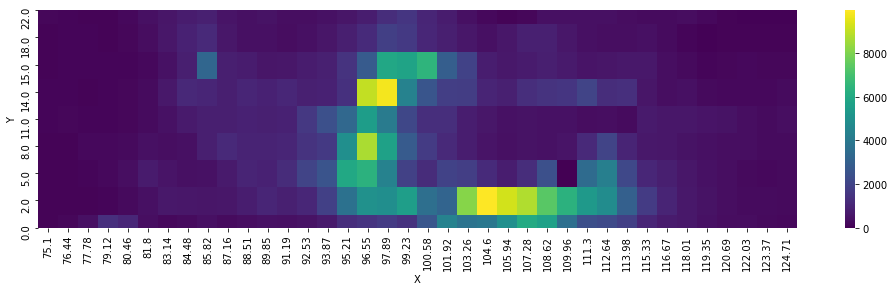

In [13]:
dataHf=(dataHa.round(2)).pivot(index='Y', columns='X', values='Peak')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataHf, cmap="viridis")
plt.gca().invert_yaxis()

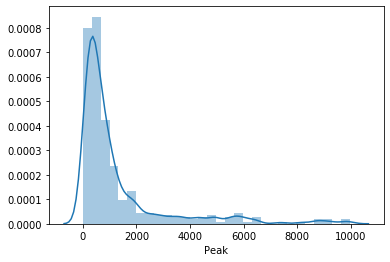

In [14]:
sns.distplot(dataHa.Peak,bins=30)

#Radial velocity 

$$\dfrac{\lambda_{obs}-\lambda}{\lambda}*c$$

In [15]:
RVHao=c*(dataHa.Center-lha)/lha

In [16]:
RVHa=RVHao+corrhelio
RVHa.describe()

count       342.000000
mean      -1082.562604
std       16198.361637
min     -299766.779000
25%        -213.857500
50%        -205.920501
75%        -196.784386
max        -181.618436
Name: Center, dtype: float64

In [17]:
dataHa=dataHa.assign(RV=RVHa.values)
dataHa

,X,Y,Center,Peak,Width,RV
56,124.713,22.0,6557.726,61.94,1.187,-206.103223
57,123.372,22.0,6557.531,56.88,1.476,-215.010935
58,122.031,22.0,6557.834,54.73,2.665,-201.169721
59,120.690,22.0,6557.795,79.74,2.527,-202.951264
60,119.349,22.0,6557.107,221.70,0.980,-234.379497
...,...,...,...,...,...,...
1289,80.460,0.0,6558.181,1068.00,0.841,-185.318563
1290,79.119,0.0,6558.235,1341.00,0.805,-182.851812
1291,77.778,0.0,6558.172,423.30,0.851,-185.729688
1292,76.437,0.0,6558.180,172.60,0.912,-185.364243


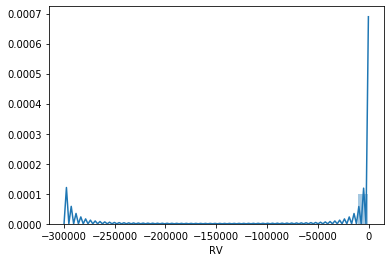

In [18]:
sns.distplot(dataHa.RV,bins=30)

(72.60295558187197,
 127.20604441812803,
 -1.1350488574011364,
 23.135048857401138)

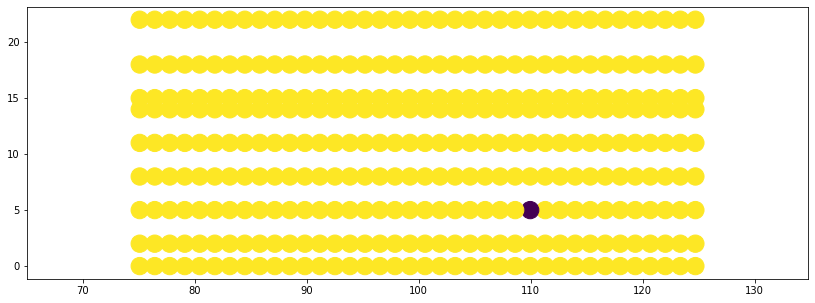

In [19]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataHa.X,dataHa.Y,c=dataHa.RV, s=300)
plt.axis('equal')

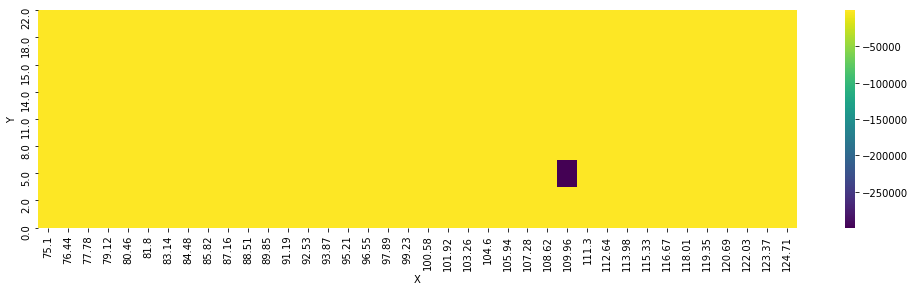

In [20]:
dataHrv=(dataHa.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataHrv, cmap="viridis")
plt.gca().invert_yaxis()

#Width

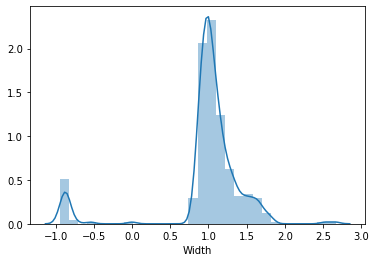

In [21]:
sns.distplot(dataHa.Width,bins=30)

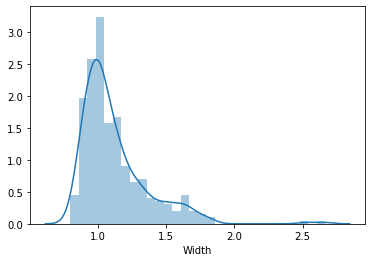

In [22]:
m2=(dataHa.Width<3)&(dataHa.Width>0)
sns.distplot(dataHa[m2].Width,bins=30)

(72.60295558187197,
 127.20604441812803,
 -1.1350488574011364,
 23.135048857401138)

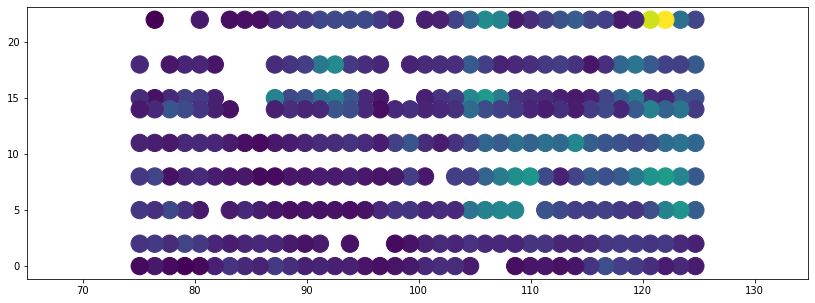

In [23]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataHa[m2].X,dataHa[m2].Y,c=dataHa[m2].Width, s=300)
plt.axis('equal')

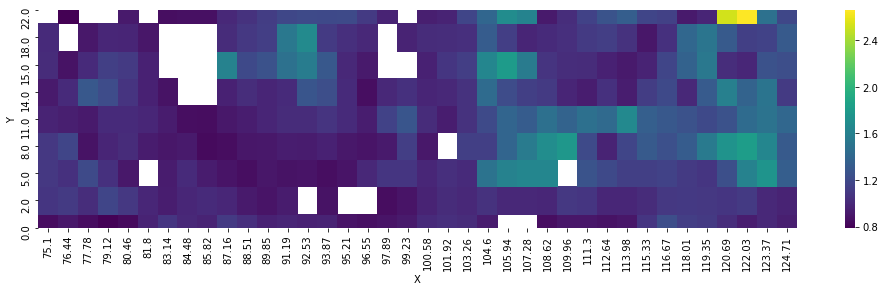

In [24]:
dataHw=(dataHa[m2].round(2)).pivot(index='Y', columns='X', values='Width')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataHw, cmap="viridis")
plt.gca().invert_yaxis()


#Sigma Disp

$$\sigma_{disp}^{2}=\sigma_{obs}^{2}-\sigma_{inst}^{2}-\sigma_{therm}^{2}$$

Sigma obs

In [25]:
a=0.6006/1.414
SigmaObs=a*(dataHa[m2].Width/lha)*c
SigmaObs

56      23.031285
57      28.638734
58      51.708825
59      49.031220
60      19.014877
          ...    
1289    16.317869
1290    15.619364
1291    16.511899
1292    17.695478
1293    16.511899
Name: Width, Length: 317, dtype: float64

Sigma therm

In [26]:
SigmaTerm=np.sqrt(166.3*(T/10000)/(Hw*1.414))
SigmaTerm

9.460231446054452

In [27]:
SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SigmaInstH**2)
SigmaDisp.describe()

/home/zalenovo/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    151.000000
mean      13.516485
std        7.902036
min        1.535415
25%        7.328483
50%       11.695675
75%       18.316655
max       47.542682
Name: Width, dtype: float64

In [28]:
dataHs=dataHa[m2]
dataHs=dataHs.assign(SigmaD=SigmaDisp.values)
dataHs.describe()

,X,Y,Center,Peak,Width,RV,SigmaD
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,151.000000
mean,100.676527,10.356467,6557.711729,1215.227224,1.117814,-206.755144,13.516485
std,14.761833,6.924255,0.293797,1762.494054,0.248349,13.420830,7.902036
min,75.096000,0.000000,6557.000000,54.730000,0.794000,-239.267319,1.535415
25%,88.506000,5.000000,6557.544000,301.100000,0.961000,-214.417087,7.328483
50%,100.575000,11.000000,6557.748000,583.400000,1.036000,-205.098251,11.695675
75%,113.985000,15.000000,6557.921000,1222.000000,1.205000,-197.195512,18.316655
max,124.713000,22.000000,6558.262000,9957.000000,2.665000,-181.618436,47.542682


/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/zalenovo/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


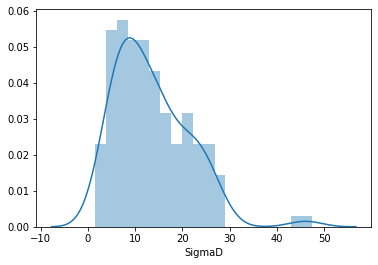

In [29]:
sns.distplot(dataHs.SigmaD,bins=20)

(65, 145)

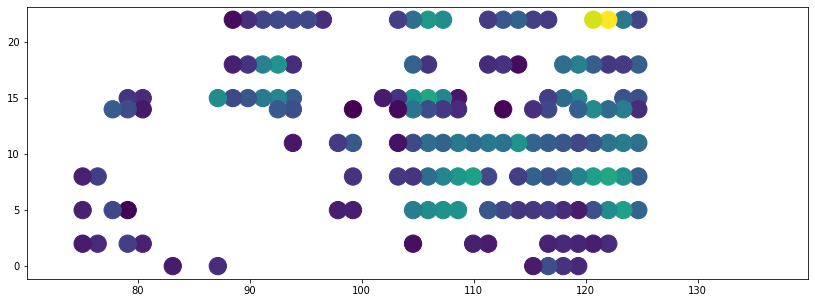

In [30]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataHs.X,dataHs.Y,c=dataHs.SigmaD, s=300)
plt.axis('equal')
ax.set_xlim(65,145)


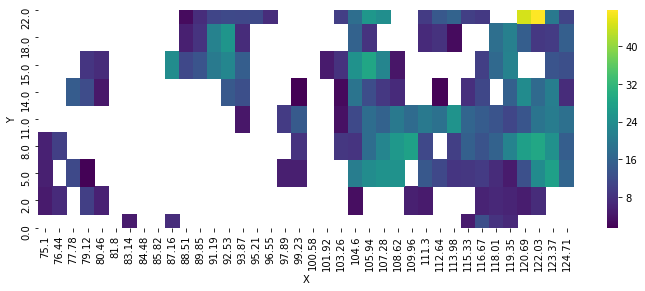

In [31]:
dataHsg=(dataHs.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataHsg, cmap="viridis")
plt.gca().invert_yaxis()

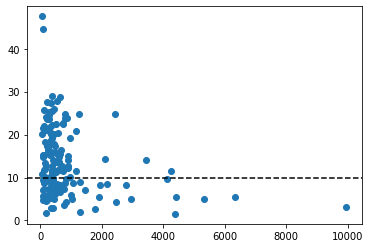

In [32]:
plt.scatter(dataHs.Peak,dataHs.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

[NII] Emission Line


In [33]:
dataN

,X,Y,Center.2,Peak.2,Width.2
56,124.713,22.0,6577.651,13.26,3.216
57,123.372,22.0,6577.604,11.15,3.398
58,122.031,22.0,6579.169,12.34,12.631
59,120.690,22.0,6578.620,20.53,3.960
60,119.349,22.0,6577.813,22.70,2.394
...,...,...,...,...,...
1289,80.460,0.0,6578.840,314.70,0.751
1290,79.119,0.0,6578.884,331.70,0.748
1291,77.778,0.0,6578.819,112.40,0.806
1292,76.437,0.0,6578.959,58.06,0.844


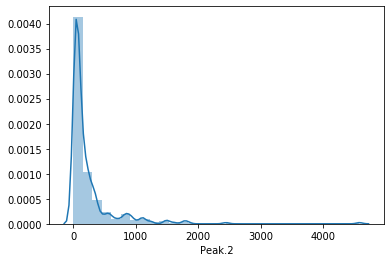

In [34]:
sns.distplot(dataN["Peak.2"],bins=30)

(72.60295558187197,
 127.20604441812803,
 -1.1350488574011364,
 23.135048857401138)

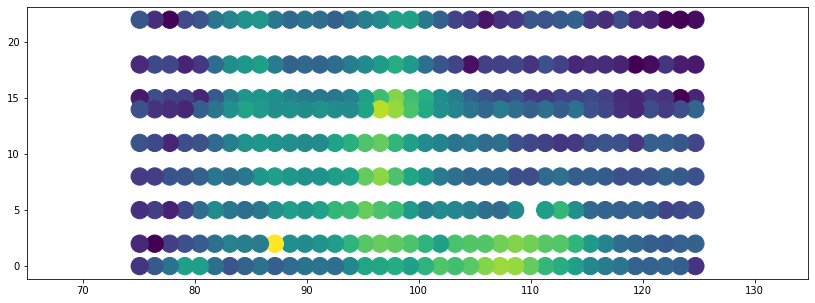

In [35]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataN.X,dataN.Y,c=np.log10(dataN["Peak.2"]), s=300)
plt.axis('equal')

In [36]:
#mnf=(dataN["Peak.2"]<35000)&(dataN["Peak.2"]>200)
#sns.distplot(dataN["Peak.2"],bins=30)

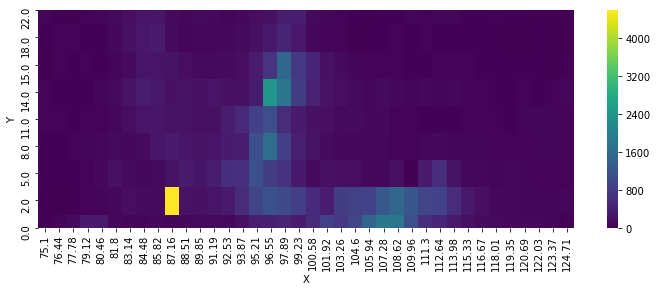

In [37]:
dataNf=(dataN.round(2)).pivot(index='Y', columns='X', values='Peak.2')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataNf, cmap="viridis")
plt.gca().invert_yaxis()


#Radial velocity 

In [38]:
RVNo=c*((dataN["Center.2"]-ln)/ln)
RVNo.describe()

count       342.000000
mean      -1084.429331
std       16199.653712
min     -299792.459000
25%        -216.795078
50%        -208.142402
75%        -200.377764
max        -116.628967
Name: Center.2, dtype: float64

In [39]:
RVN=RVNo+corrhelio
RVN.describe()

count       342.000000
mean      -1058.749331
std       16199.653712
min     -299766.779000
25%        -191.115078
50%        -182.462402
75%        -174.697764
max         -90.948967
Name: Center.2, dtype: float64

In [40]:
dataN=dataN.assign(RV=RVN.values)


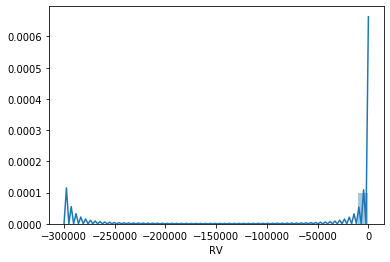

In [41]:
sns.distplot(dataN.RV,bins=30)

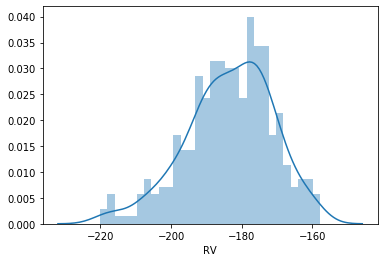

In [42]:
mn=(dataN.RV<-150)&(dataN.RV>-350)
sns.distplot(dataN[mn].RV,bins=30)

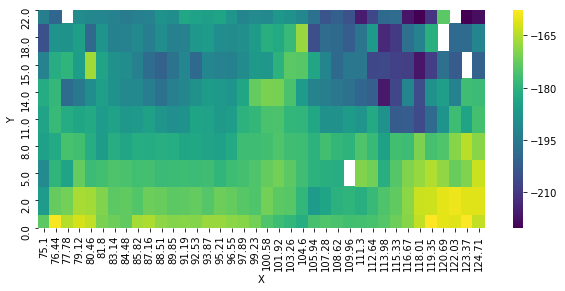

In [43]:
dataNrv=(dataN[mn].round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(dataNrv, cmap="viridis")
plt.gca().invert_yaxis()

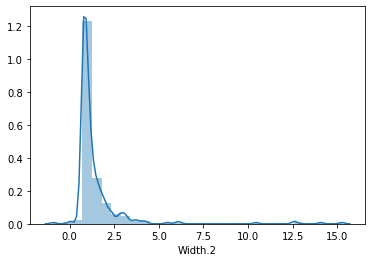

In [44]:
sns.distplot(dataN["Width.2"],bins=30)

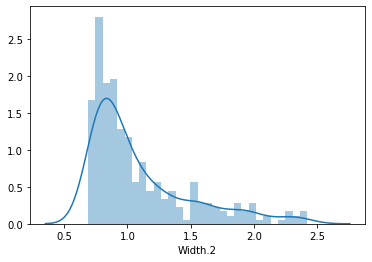

In [45]:
mns=(dataN["Width.2"]<2.5)&(dataN["Width.2"]>0.5)
dataN=dataN[mns]
sns.distplot(dataN["Width.2"][mns],bins=30)

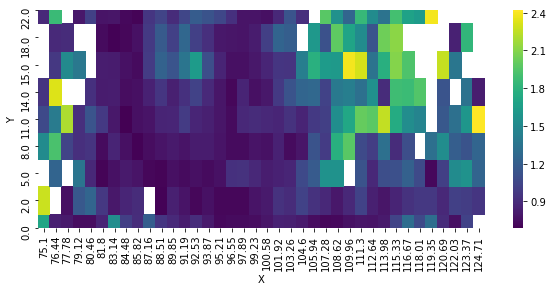

In [46]:
dataNs=(dataN.round(2)).pivot(index='Y', columns='X', values='Width.2')
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(dataNs, cmap="viridis")
plt.gca().invert_yaxis()

Sigma Disp

$$\frac{0.6006}{1.414}* \frac{Width}{\lambda}*c$$

In [47]:
SigmaObsN=a*(dataN["Width.2"]/lha)*c
SigmaObsN

60      46.450629
61      31.549174
62      32.732753
63      36.807370
64      26.174561
          ...    
1289    14.571605
1290    14.513396
1291    15.638766
1292    16.376078
1293    33.159618
Name: Width.2, Length: 309, dtype: float64

In [48]:
SigmaTermN=np.sqrt(166.3*(T/10000)/(Nw*1.414))
SigmaTermN

2.537763743450441

In [49]:
SigmaDispN=np.sqrt(SigmaObsN**2-SigmaTermN**2-SigmaInstN**2)
SigmaDispN.describe()

count    309.000000
mean      16.505132
std        9.255345
min        5.317879
25%        9.513310
50%       13.419843
75%       20.901183
max       45.324846
Name: Width.2, dtype: float64

In [50]:
dataN=dataN.assign(SigmaD=SigmaDispN.values)
dataN.describe()

,X,Y,Center.2,Peak.2,Width.2,RV,SigmaD
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,99.437971,10.135922,6578.422382,251.381942,1.091136,-182.786564,16.505132
std,13.945264,6.947458,0.258816,353.774767,0.399938,11.786574,9.255345
min,75.096000,0.000000,6577.603000,17.510000,0.689000,-220.101544,5.317879
25%,87.165000,5.000000,6578.263000,53.710000,0.800000,-190.044879,9.513310
50%,99.234000,11.000000,6578.447000,109.000000,0.937000,-181.665445,13.419843
75%,111.303000,15.000000,6578.595000,266.800000,1.249000,-174.925466,20.901183
max,124.713000,22.000000,6578.972000,2445.000000,2.420000,-157.756735,45.324846


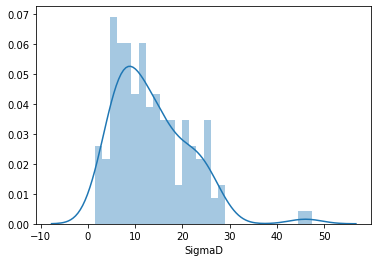

In [51]:
sns.distplot(dataHs.SigmaD,bins=30)

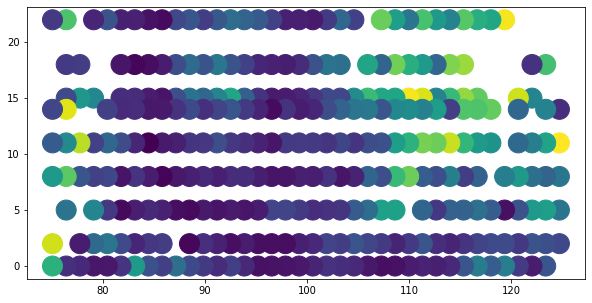

In [52]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(dataN.X,dataN.Y,c=dataN.SigmaD, s=400)
#plt.axis('equal')


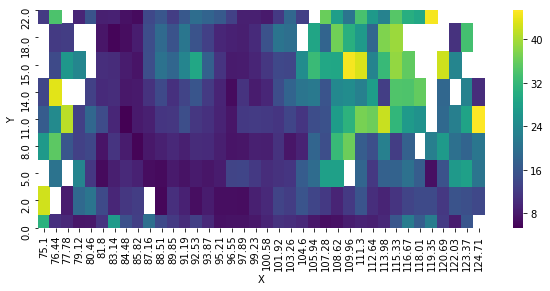

In [53]:
dataNsd=(dataN.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(dataNsd, cmap="viridis")
plt.gca().invert_yaxis()


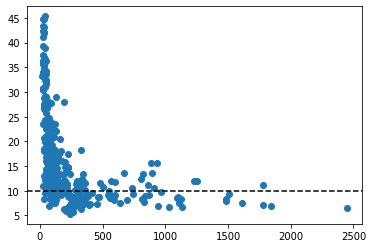

In [54]:
plt.scatter(dataN["Peak.2"],dataN.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

[SII] Emission Line


/home/zalenovo/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(72.58229456391877, 127.22670543608123, -1.150588668138337, 23.150588668138337)

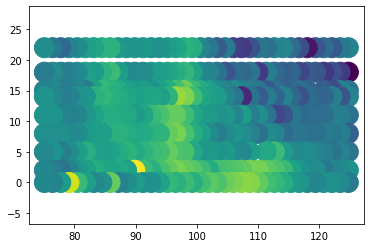

In [55]:
#ig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataS.X,dataS.Y,c=np.log10(dataS["Peak.4"]), s=400)
plt.axis('equal')

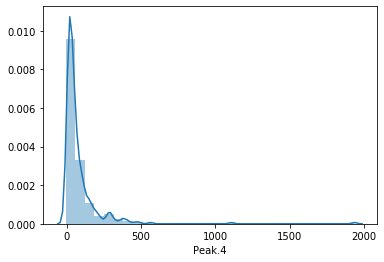

In [56]:
sns.distplot(dataS["Peak.4"],bins=30)

In [57]:
msf=(dataS["Peak.4"]<1000)&(dataS["Peak.4"]>0)
dataS=dataS[msf]

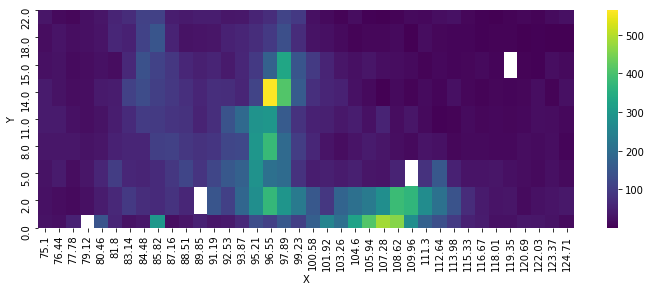

In [58]:
dataSf=(dataS.round(2)).pivot(index='Y', columns='X', values='Peak.4')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataSf, cmap="viridis")
plt.gca().invert_yaxis()


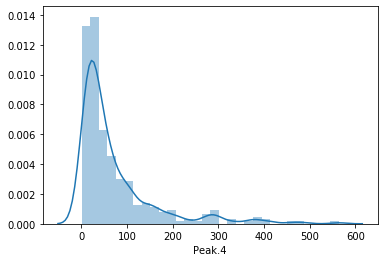

In [59]:
sns.distplot(dataS["Peak.4"],bins=30)

#Radial velocity 

In [60]:
RVSo=c*(dataS["Center.4"]-ls)/ls
RVS=RVSo+corrhelio
RVS.describe()

count    338.000000
mean    -183.793425
std       19.276522
min     -258.746481
25%     -191.603838
50%     -184.522126
75%     -177.329067
max        9.779553
Name: Center.4, dtype: float64

In [61]:
dataS=dataS.assign(RV=RVS.values)
dataS

,X,Y,Center.4,Peak.4,Width.4,RV
56,124.713,22.0,6726.034,22.710,0.461,-195.501006
57,123.372,22.0,6724.991,16.650,-0.657,-241.955253
58,122.031,22.0,6727.189,6.243,4.042,-144.058384
59,120.690,22.0,6727.291,11.480,2.342,-139.515399
60,119.349,22.0,6728.218,5.806,7.375,-98.227684
...,...,...,...,...,...,...
1288,81.801,0.0,6726.553,58.540,0.741,-172.385230
1289,80.460,0.0,6726.630,145.900,0.728,-168.955722
1291,77.778,0.0,6726.680,52.220,-0.816,-166.728769
1292,76.437,0.0,6726.566,23.770,0.690,-171.806222


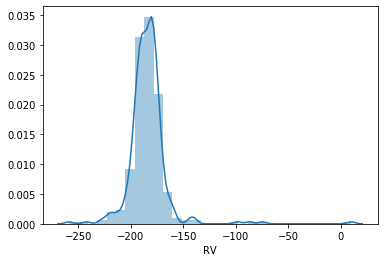

In [62]:
sns.distplot(dataS.RV,bins=30)

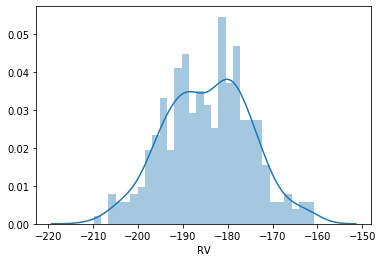

In [63]:
msrv=(dataS["RV"]<-160)&(dataS["RV"]>-210)
dataS=dataS[msrv]
sns.distplot(dataS.RV,bins=30)

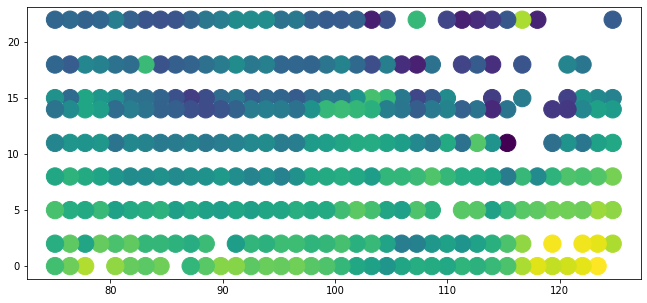

In [64]:
fig, ax = plt.subplots(figsize=(11,5))
plt.scatter(dataS.X,dataS.Y,c=dataS.RV, s=300)


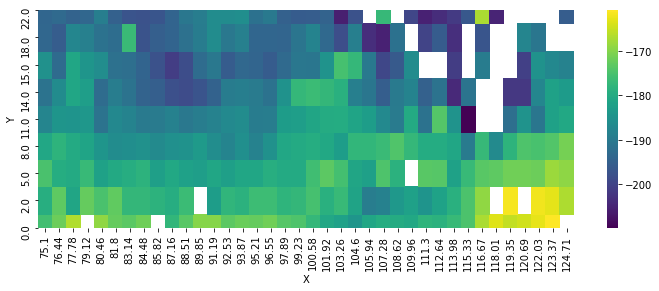

In [65]:
dataSrv=(dataS.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataSrv, cmap="viridis")
plt.gca().invert_yaxis()

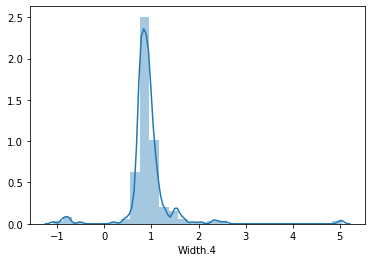

In [66]:
sns.distplot(dataS["Width.4"],bins=30)

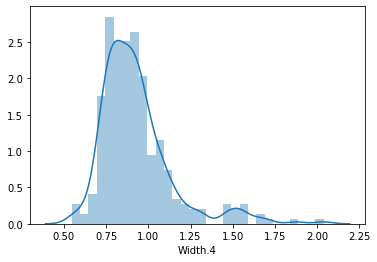

In [67]:
ms=(dataS["Width.4"]<2.3)&(dataS["Width.4"]>0.5)
dataS=dataS[ms]
sns.distplot(dataS["Width.4"],bins=30)

(72.60295558187197,
 127.20604441812803,
 -1.1350488574011364,
 23.135048857401138)

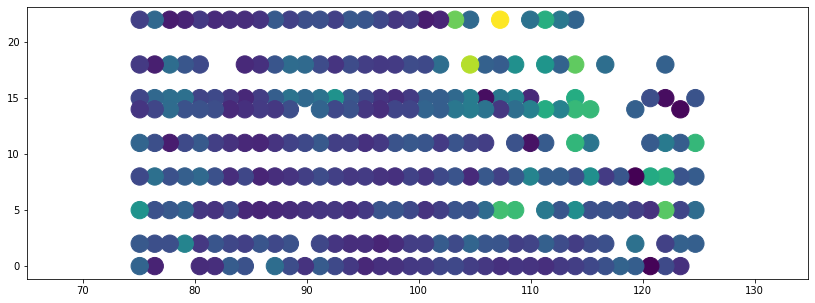

In [68]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataS.X,dataS.Y,c=dataS["Width.4"], s=300)
plt.axis('equal')

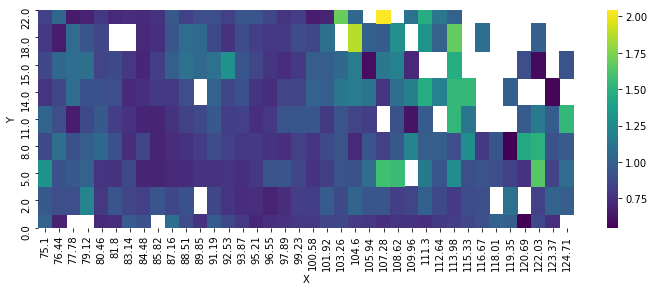

In [69]:
dataSw=(dataS.round(2)).pivot(index='Y', columns='X', values='Width.4')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataSw, cmap="viridis")
plt.gca().invert_yaxis()

In [70]:
SigmaObsS=a*(dataS["Width.4"]/ln)*c
SigmaObsS

64      19.710923
65      22.070817
66      28.628229
67      21.393798
69      39.441189
          ...    
1287    18.840470
1288    14.333458
1289    14.081994
1292    13.346945
1293    19.788296
Name: Width.4, Length: 296, dtype: float64

In [71]:
SigmaTermS=np.sqrt(166.3*(T/10000)/(Sw*1.414))
SigmaTermS

1.677271933195367

In [72]:
SigmaDispS=np.sqrt(SigmaObsS**2-SigmaTermS**2-SigmaInstS**2)
SigmaDispS.describe()

count    227.000000
mean      10.830906
std        6.165117
min        0.643478
25%        7.062794
50%        9.823450
75%       13.474733
max       36.438909
Name: Width.4, dtype: float64

In [73]:
dataS=dataS.assign(SigmaD=SigmaDispS.values)
dataS.describe()

,X,Y,Center.4,Peak.4,Width.4,RV,SigmaD
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,227.000000
mean,97.988139,9.983108,6726.286253,79.305311,0.928017,-184.265876,10.830906
std,14.017532,6.854645,0.207236,91.373154,0.216415,9.230089,6.165117
min,75.096000,0.000000,6725.712000,1.660000,0.545000,-209.842586,0.643478
25%,85.824000,5.000000,6726.141500,23.725000,0.787000,-190.713056,7.062794
50%,97.893000,11.000000,6726.291500,44.595000,0.884000,-184.032196,9.823450
75%,108.621000,15.000000,6726.436250,96.445000,0.992000,-177.585166,13.474733
max,124.713000,22.000000,6726.812000,563.600000,2.039000,-160.849612,36.438909


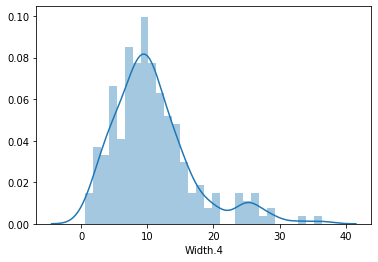

In [74]:
sns.distplot(SigmaDispS,bins=30)

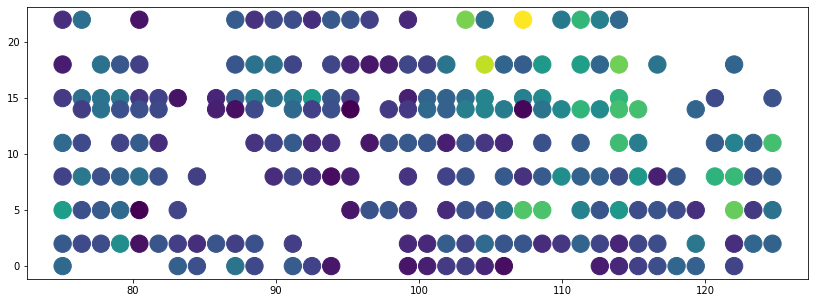

In [75]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataS.X,dataS.Y,c=dataS.SigmaD, s=300)


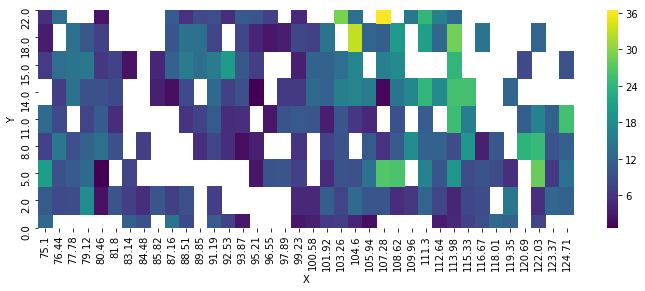

In [76]:
dataSsd=(dataS.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataSsd, cmap="viridis")
plt.gca().invert_yaxis()

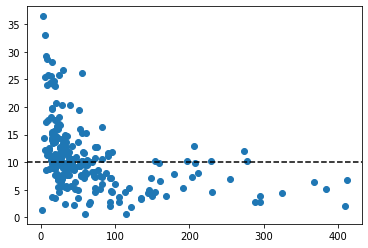

In [77]:
plt.scatter(dataS["Peak.4"],dataS.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

#Hbeta Emission Line

In [78]:
dataHb.describe()

,X,Y,Center,Peak,Width
count,189.000000,189.000000,189.000000,189.000000,189.000000
mean,100.128000,10.555556,4778.310497,-73.149762,-0.718439
std,8.684507,7.012400,609.322798,1122.108668,74.517244
min,85.824000,0.000000,0.000000,-13540.000000,-868.597000
25%,92.976000,5.000000,4857.466000,13.160000,0.720000
50%,100.128000,11.000000,4857.632000,23.270000,0.956000
75%,107.280000,15.000000,4857.797000,39.890000,1.327000
max,114.432000,22.000000,4878.466000,307.100000,428.232000


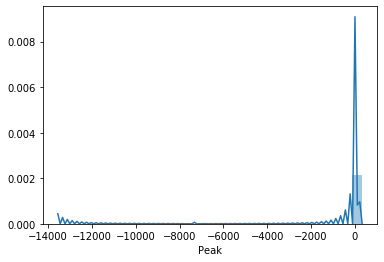

In [79]:
sns.distplot(dataHb.Peak,bins=30)

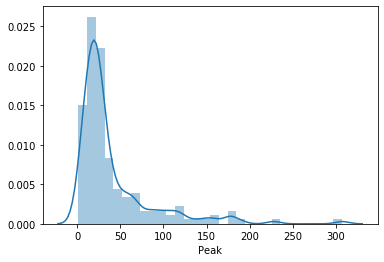

In [80]:
mfhb=(dataHb.Peak<1000)&(dataHb.Peak>0)
sns.distplot(dataHb[mfhb].Peak,bins=30)

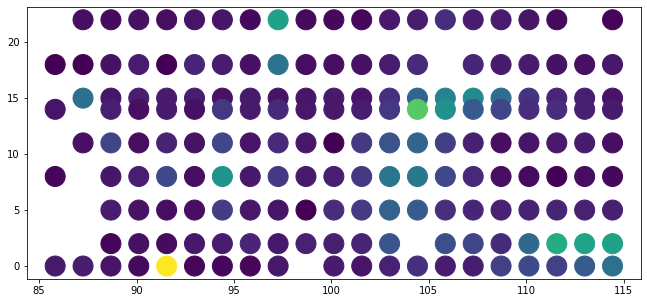

In [81]:
fig, ax = plt.subplots(figsize=(11,5))
plt.scatter(dataHb[mfhb].X,dataHb[mfhb].Y,c=dataHb[mfhb].Peak, s=400)
#plt.axis('equal')

Radial velocity

In [82]:
dataHb.Center.describe()

count     189.000000
mean     4778.310497
std       609.322798
min         0.000000
25%      4857.466000
50%      4857.632000
75%      4857.797000
max      4878.466000
Name: Center, dtype: float64

In [83]:
#dataHb.Center-3
RVHbo=c*(dataHb.Center-lhb)/lhb

In [84]:
RVHb=RVHbo+corrhelio
RVHb.describe()

count       189.000000
mean      -5074.029799
std       37578.765681
min     -299766.779000
25%        -192.272386
50%        -182.034668
75%        -171.858623
max        1102.860640
Name: Center, dtype: float64

In [85]:
dataHb=dataHb.assign(RV=RVHb.values)
dataHb

,X,Y,Center,Peak,Width,RV
70,114.4320,22.0,4855.618,4.117,5.186,-306.244093
71,113.0016,22.0,4855.685,-3.415,1.875,-302.112002
72,111.5712,22.0,4857.594,8.551,1.327,-184.378242
73,110.1408,22.0,4857.176,18.660,1.582,-210.157557
74,108.7104,22.0,4857.595,24.460,1.217,-184.316569
...,...,...,...,...,...,...
1286,91.5456,0.0,4857.892,307.100,-0.174,-165.999688
1287,90.1152,0.0,4858.299,8.549,1.602,-140.898776
1288,88.6848,0.0,4845.765,16.790,428.232,-913.908174
1289,87.2544,0.0,4858.085,25.330,0.801,-154.096799


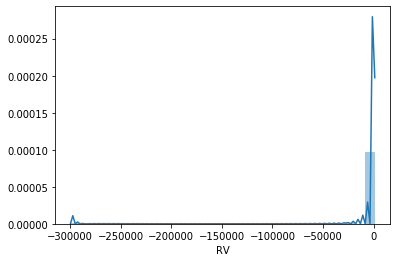

In [86]:
sns.distplot(dataHb.RV,bins=30)

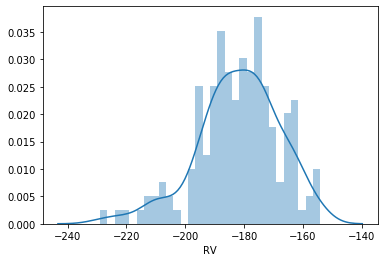

In [87]:
mvhb=(dataHb.RV<-150)&(dataHb.RV>-230)
sns.distplot(dataHb[mvhb].RV,bins=30)

(84.36514635770122,
 115.89085364229878,
 -1.1438110717514203,
 23.143811071751422)

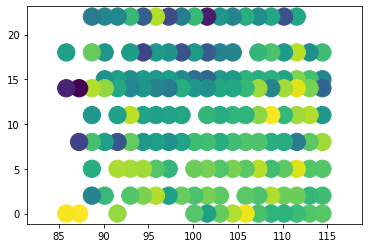

In [88]:
#fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataHb[mvhb].X,dataHb[mvhb].Y,c=dataHb[mvhb].RV, s=300)
plt.axis('equal')

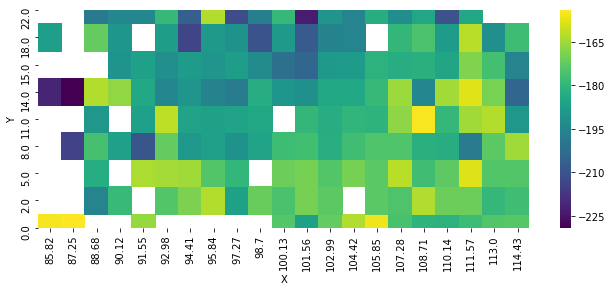

In [89]:
dataHbrv=(dataHb[mvhb].round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(11, 4))
sns.heatmap(dataHbrv, cmap="viridis")
plt.gca().invert_yaxis()

Width

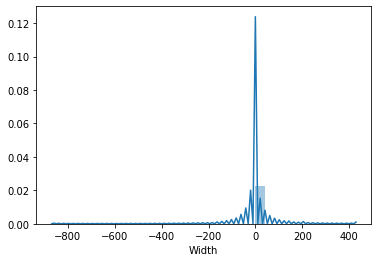

In [90]:
sns.distplot(dataHb.Width,bins=30)

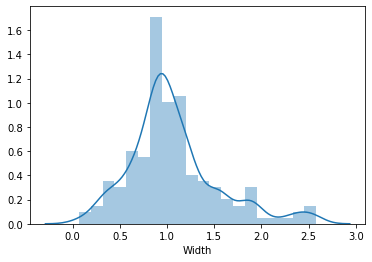

In [91]:
mshb=(dataHb.Width<3)&(dataHb.Width>0)
sns.distplot(dataHb[mshb].Width,bins=20)

(84.37951909882233, 115.8764809011777, -1.1404709345106698, 23.14047093451067)

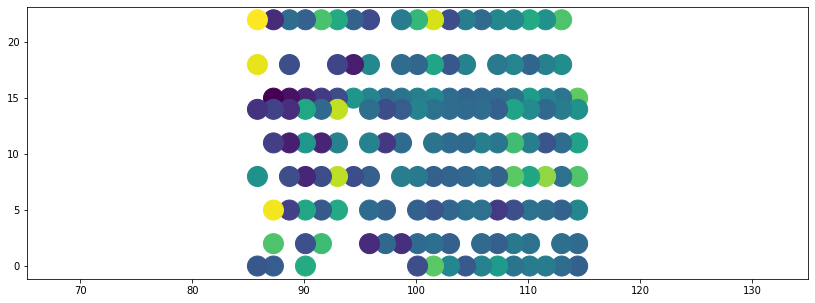

In [92]:

fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataHb[mshb].X,dataHb[mshb].Y,c=dataHb[mshb].Width, s=400)
plt.axis('equal')

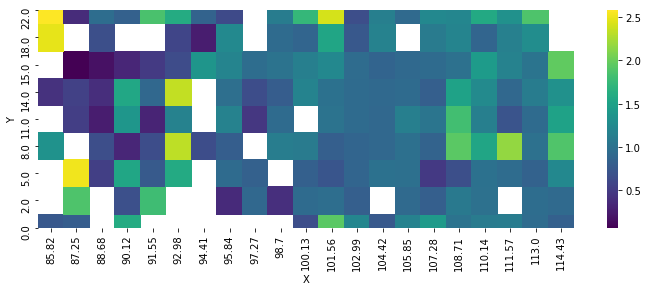

In [93]:

dataHbw=(dataHb[mshb].round(2)).pivot(index='Y', columns='X', values='Width')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataHbw, cmap="viridis")
plt.gca().invert_yaxis()

Sigma Disp

In [94]:
SigmaObsHb=a*(dataHb[mshb].Width/lhb)*c
SigmaObsHb

71      49.117050
72      34.761773
73      41.441692
74      31.880240
75      32.482742
          ...    
1279    50.767383
1280    17.263006
1287    41.965607
1289    20.982804
1290    19.646820
Name: Width, Length: 158, dtype: float64

In [95]:
#Sigma therm
SigmaTermH=np.sqrt(166.3*(T/10000)/(Hw*1.414))
SigmaTermH

9.460231446054452

In [96]:
SigmaDispHb=np.sqrt(SigmaObsHb**2-SigmaTerm**2-SigmaInstH**2)
SigmaDispHb.describe()

count    122.000000
mean      23.331180
std       13.847041
min        5.175140
25%       13.711952
50%       20.286743
75%       29.498035
max       64.508363
Name: Width, dtype: float64

In [97]:
dataHbs=dataHb[mshb]
dataHbs=dataHbs.assign(SigmaD=SigmaDispHb.values)
dataHbs.describe()

,X,Y,Center,Peak,Width,RV,SigmaD
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,122.000000
mean,101.042370,11.000000,4857.740911,37.800158,1.066291,-175.317776,23.331180
std,8.549261,6.801086,1.379916,39.303598,0.477454,85.103559,13.847041
min,85.824000,0.000000,4850.226000,-11.840000,0.066000,-638.784915,5.175140
25%,92.976000,5.000000,4857.512250,15.200000,0.816250,-189.420010,13.711952
50%,101.558400,11.000000,4857.656000,24.290000,0.960500,-180.554516,20.286743
75%,108.710400,15.000000,4857.796250,39.877500,1.230500,-171.904878,29.498035
max,114.432000,22.000000,4869.999000,228.100000,2.582000,580.675338,64.508363


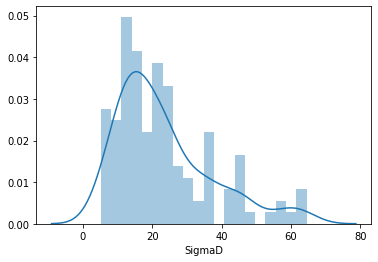

In [98]:
sns.distplot(dataHbs.SigmaD,bins=20)

(84.36514635770122,
 115.89085364229878,
 -1.1438110717514203,
 23.143811071751422)

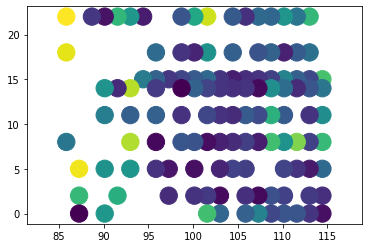

In [99]:
#fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataHbs.X,dataHbs.Y,c=dataHbs.SigmaD, s=300)
plt.axis('equal')


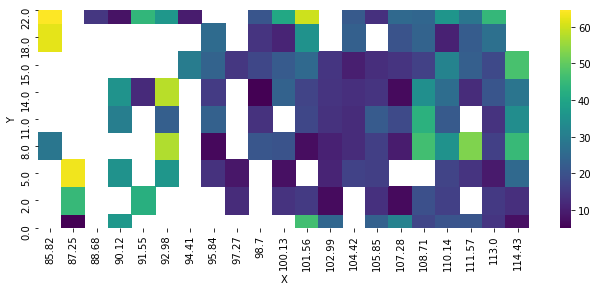

In [100]:
dataHbsg=(dataHbs.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(11, 4))
sns.heatmap(dataHbsg, cmap="viridis")
plt.gca().invert_yaxis()

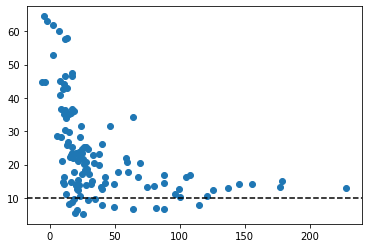

In [101]:
plt.scatter(dataHbs.Peak,dataHbs.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

#[OIII] Emission Line

In [102]:
dataO

,X,Y,Center.2,Peak.2,Width.2
70,114.4320,22.0,5002.999,7.978,2.375
71,113.0016,22.0,5003.425,40.570,0.089
72,111.5712,22.0,5003.453,13.920,1.330
73,110.1408,22.0,5003.232,19.390,1.325
74,108.7104,22.0,5003.061,19.840,1.100
...,...,...,...,...,...
1286,91.5456,0.0,5419.447,-22.130,-567.692
1287,90.1152,0.0,5248.129,-43.440,1609.308
1288,88.6848,0.0,5006.862,-7.291,-0.686
1289,87.2544,0.0,5003.369,11.400,0.641


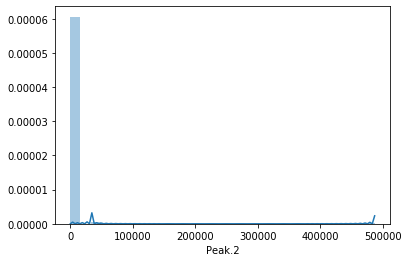

In [103]:
sns.distplot(dataO["Peak.2"],bins=30)

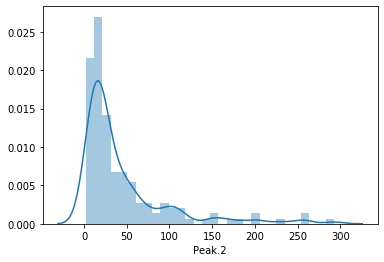

In [104]:
mof=(dataO["Peak.2"]<1000)&(dataO["Peak.2"]>0)
sns.distplot(dataO["Peak.2"][mof],bins=30)

(84.37951909882233, 115.8764809011777, -1.1404709345106698, 23.14047093451067)

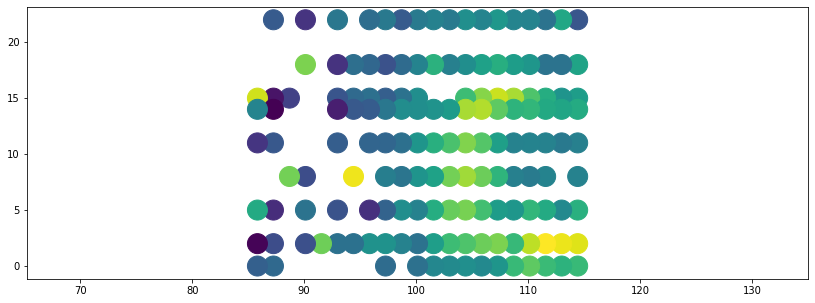

In [105]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataO["X"][mof],dataO["Y"][mof],c=np.log10(dataO["Peak.2"][mof]), s=400)
plt.axis('equal')

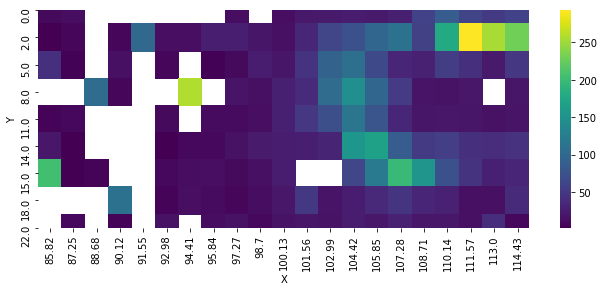

In [106]:
dataOf=(dataO[mof].round(2)).pivot(index='Y', columns='X', values='Peak.2')
fig, ax = plt.subplots(figsize=(11, 4))
sns.heatmap(dataOf, cmap="viridis")

Radial velocity 

In [107]:
RVOo=c*((dataO["Center.2"]-loiii)/loiii)
RVOo.describe()

count       189.000000
mean      -3085.744138
std       30862.636216
min     -299792.459000
25%        -302.067242
50%        -289.496073
75%        -275.069159
max       24630.333043
Name: Center.2, dtype: float64

In [108]:
RVO=RVOo+corrhelio
RVO.describe()

count       189.000000
mean      -3060.064138
std       30862.636216
min     -299766.779000
25%        -276.387242
50%        -263.816073
75%        -249.389159
max       24656.013043
Name: Center.2, dtype: float64

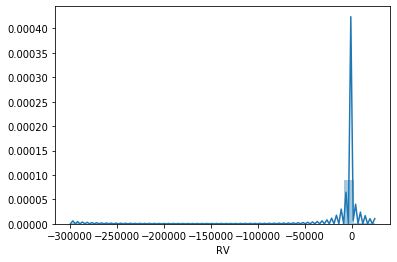

In [109]:
dataO=dataO.assign(RV=RVO.values)
sns.distplot(dataO.RV,bins=30)

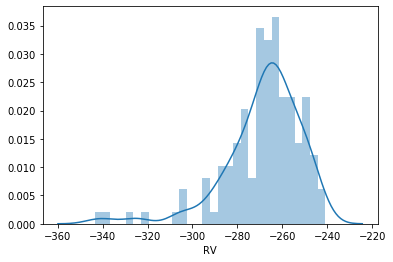

In [110]:
morv=(dataO.RV<-240)&(dataO.RV>-350)
sns.distplot(dataO[morv].RV,bins=30)

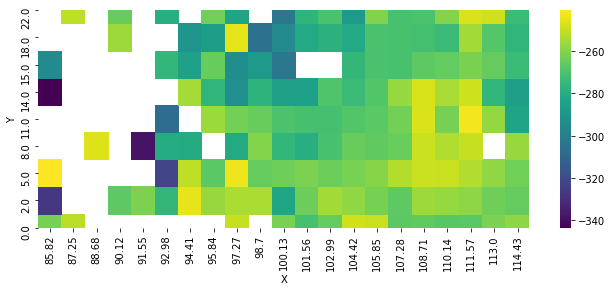

In [111]:
dataOrv=(dataO[morv].round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(11, 4))
sns.heatmap(dataOrv, cmap="viridis")
plt.gca().invert_yaxis()

Width

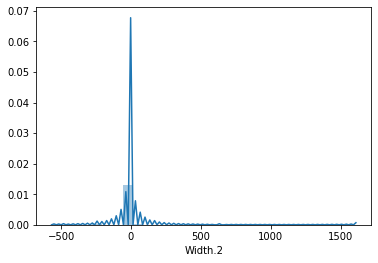

In [112]:
sns.distplot(dataO["Width.2"],bins=30)

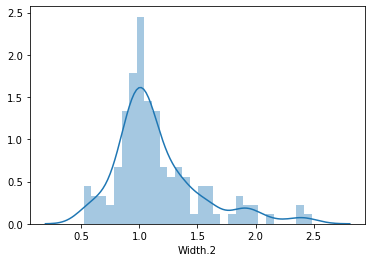

In [113]:
mos=(dataO["Width.2"]<2.5)&(dataO["Width.2"]>0.5)
sns.distplot(dataO["Width.2"][mos],bins=30)

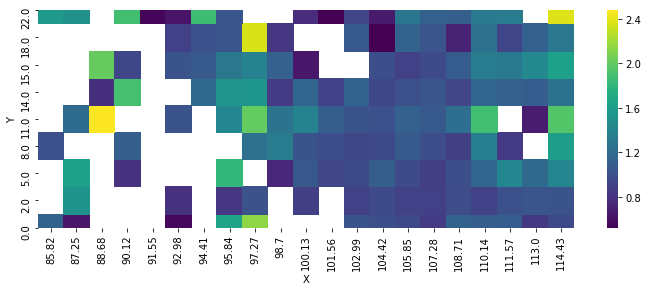

In [114]:
dataOs=(dataO[mos].round(2)).pivot(index='Y', columns='X', values='Width.2')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataOs, cmap="viridis")
plt.gca().invert_yaxis()

Sigma Disp

In [115]:
SigmaObsO=a*(dataO["Width.2"][mos]/lhb)*c
SigmaObsO

70      62.214930
72      34.840361
73      34.709382
74      28.815336
75      29.077294
          ...    
1282    56.399471
1283    43.537353
1285    14.591038
1289    16.791482
1290    29.679796
Name: Width.2, Length: 137, dtype: float64

In [116]:
SigmaTermO=np.sqrt(166.3*(T/10000)/(Ow*1.414))
SigmaTermO

2.3744730989181915

In [117]:
SigmaDispO=np.sqrt(SigmaObsO**2-SigmaTermO**2-SigmaInstO**2)
SigmaDispO.head()

70    59.195096
72    29.106917
73    28.950010
74    21.533357
75    21.882662
Name: Width.2, dtype: float64

In [118]:
dataOsd=dataO[mos].assign(SigmaD=SigmaDispO.values)
dataOsd.describe()

,X,Y,Center.2,Peak.2,Width.2,RV,SigmaD
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,127.000000
mean,102.560724,10.912409,5003.146482,40.777336,1.146460,-264.864762,23.652826
std,8.073630,6.989987,1.234482,51.695080,0.373204,73.899432,11.404089
min,85.824000,0.000000,4995.318000,-14.260000,0.518000,-733.498907,3.772258
25%,95.836800,5.000000,5002.969000,12.240000,0.928000,-275.489301,16.119967
50%,104.419200,11.000000,5003.143000,23.660000,1.047000,-265.073190,20.755834
75%,108.710400,15.000000,5003.296000,51.140000,1.301000,-255.914195,28.729644
max,114.432000,22.000000,5010.330000,293.000000,2.484000,165.160118,62.189240


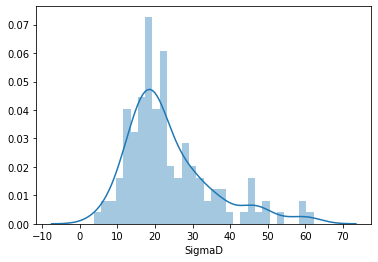

In [119]:
sns.distplot(dataOsd.SigmaD,bins=30)

(84.37523325287297, 115.88076674712703, -1.1452478803393997, 23.1452478803394)

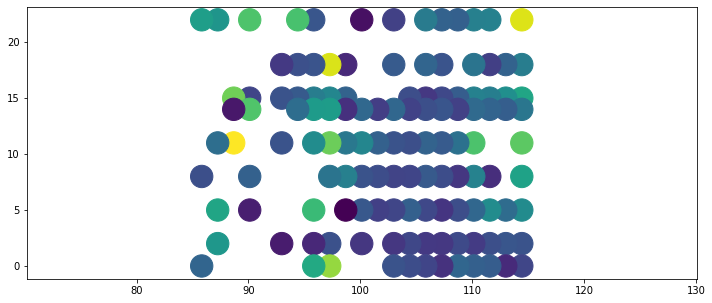

In [120]:
fig, ax = plt.subplots(figsize=(12,5))
plt.scatter(dataOsd.X,dataOsd.Y,c=dataOsd.SigmaD, s=500)
plt.axis('equal')


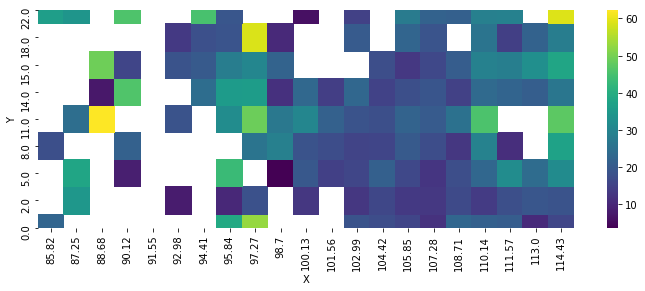

In [121]:
dataOsx=(dataOsd.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataOsx, cmap="viridis")
plt.gca().invert_yaxis()

In [122]:
dataOsd

,X,Y,Center.2,Peak.2,Width.2,RV,SigmaD
70,114.4320,22.0,5002.999,7.978,2.375,-273.693420,59.195096
72,111.5712,22.0,5003.453,13.920,1.330,-246.515749,29.106917
73,110.1408,22.0,5003.232,19.390,1.325,-259.745408,28.950010
74,108.7104,22.0,5003.061,19.840,1.100,-269.981932,21.533357
75,107.2800,22.0,5003.051,29.040,1.110,-270.580559,21.882662
...,...,...,...,...,...,...,...
1282,97.2672,0.0,5003.394,12.080,2.153,-250.047649,53.049620
1283,95.8368,0.0,5005.093,-7.475,1.662,-148.340902,39.100678
1285,92.9760,0.0,5005.814,-10.460,0.557,-105.179887,NaN
1289,87.2544,0.0,5003.369,11.400,0.641,-251.544217,NaN


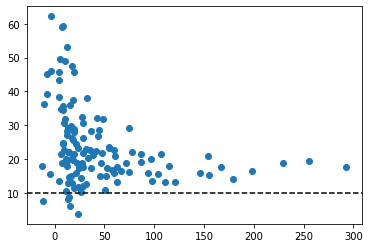

In [123]:
plt.scatter(dataOsd["Peak.2"],dataOsd.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')